In [202]:
import tradingeconomics as te
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [256]:
te.login()

# 3 months interest rates

In [227]:
three_months_ir = te.getEurostatData(category = '3-month-interest rate', output_type = 'df')

In [228]:
three_months_ir

,ID,Country,Category,CategoryGroup,URL,Unit,Frequency,LatestValue,LatestValueDate,PreviousValue,PreviousValueDate,FirstValue,FirstValueDate,HighestValue,HighestValueDate,LowestValue,LowestValueDate,LastUpdate
0,7512,Czech Republic,3-month-interest rate,Interest rates,/czech-republic/3-month-interest-rate-eurostat...,%,Monthly,6.64,2022-06-30T00:00:00,5.97,2022-05-31T00:00:00,0.69,2021-07-31T00:00:00,6.64,2022-06-30T00:00:00,0.69,2021-07-31T00:00:00,2022-07-13T17:54:00
1,7513,Denmark,3-month-interest rate,Interest rates,/denmark/3-month-interest-rate-eurostat-data.html,%,Monthly,0.01,2022-06-30T00:00:00,-0.15,2022-05-31T00:00:00,-0.21,2021-07-31T00:00:00,0.01,2022-06-30T00:00:00,-0.29,2022-01-31T00:00:00,2022-07-13T17:54:00
2,7514,Croatia,3-month-interest rate,Interest rates,/croatia/3-month-interest-rate-eurostat-data.html,%,Monthly,0.39,2019-12-31T00:00:00,0.41,2019-11-30T00:00:00,0.39,2019-12-31T00:00:00,0.39,2019-12-31T00:00:00,0.39,2019-12-31T00:00:00,2020-12-11T23:27:00
3,7515,Hungary,3-month-interest rate,Interest rates,/hungary/3-month-interest-rate-eurostat-data.html,%,Monthly,7.47,2022-06-30T00:00:00,6.57,2022-05-31T00:00:00,0.00,2021-07-31T00:00:00,7.47,2022-06-30T00:00:00,0.00,2021-07-31T00:00:00,2022-07-13T17:54:00
4,7516,Poland,3-month-interest rate,Interest rates,/poland/3-month-interest-rate-eurostat-data.html,%,Monthly,6.85,2022-06-30T00:00:00,6.42,2022-05-31T00:00:00,0.21,2021-07-31T00:00:00,6.85,2022-06-30T00:00:00,0.21,2021-08-31T00:00:00,2022-07-13T17:54:00
5,7517,Romania,3-month-interest rate,Interest rates,/romania/3-month-interest-rate-eurostat-data.html,%,Monthly,6.03,2022-06-30T00:00:00,5.38,2022-05-31T00:00:00,1.36,2021-07-31T00:00:00,6.03,2022-06-30T00:00:00,1.36,2021-07-31T00:00:00,2022-07-13T17:54:00
6,7518,Sweden,3-month-interest rate,Interest rates,/sweden/3-month-interest-rate-eurostat-data.html,%,Monthly,0.72,2022-06-30T00:00:00,0.47,2022-05-31T00:00:00,-0.03,2021-07-31T00:00:00,0.72,2022-06-30T00:00:00,-0.10,2021-11-30T00:00:00,2022-07-13T17:54:00
7,7510,Euro Area,3-month-interest rate,Interest rates,/euro-area/3-month-interest-rate-eurostat-data...,%,Monthly,-0.24,2022-06-30T00:00:00,-0.39,2022-05-31T00:00:00,-0.54,2021-07-31T00:00:00,-0.24,2022-06-30T00:00:00,-0.58,2021-12-31T00:00:00,2022-07-13T17:54:00


In [229]:
id_country = dict(zip(three_months_ir['ID'], three_months_ir['Country']))

In [230]:
id_country

{7512: 'Czech Republic',
 7513: 'Denmark',
 7514: 'Croatia',
 7515: 'Hungary',
 7516: 'Poland',
 7517: 'Romania',
 7518: 'Sweden',
 7510: 'Euro Area'}

In [231]:
df = pd.DataFrame()
df.index.name = 'Date'

for id in id_country.keys():

    interest_rate_hist = te.getHistoricalEurostat(ID=str(id), output_type = 'df')
    
    data = interest_rate_hist[['Date', 'Value']]
    data.set_index('Date', inplace=True)
    data.index = pd.to_datetime(data.index)

    country_data = data[['Value']].rename(columns={'Value': id_country[id]})
    df = pd.merge(df, country_data, on='Date', how='outer') 
    
df

,Czech Republic,Denmark,Croatia,Hungary,Poland,Romania,Sweden,Euro Area
Date,,,,,,,,
2022-06-30,6.64,0.0143,NaN,7.47,6.85,6.03,0.7236,-0.2392
2022-05-31,5.97,-0.1533,NaN,6.57,6.42,5.38,0.4655,-0.3857
2022-04-30,5.36,-0.2107,NaN,6.36,5.48,4.57,0.1122,-0.4479
2022-03-31,4.86,-0.2436,NaN,5.96,4.27,4.21,0.0365,-0.4950
2022-02-28,4.69,-0.2673,NaN,4.42,3.33,3.28,-0.0453,-0.5315
2022-01-31,4.21,-0.2948,NaN,4.06,2.79,2.90,-0.0335,-0.5601
2021-12-31,3.50,-0.2729,NaN,3.72,2.35,2.68,-0.0983,-0.5820
2021-11-30,2.97,-0.2752,NaN,2.58,1.57,2.39,-0.0995,-0.5674
2021-10-31,2.02,-0.2763,NaN,2.00,0.61,2.01,-0.0736,-0.5498


In [232]:
df.drop(columns=['Croatia'], inplace=True)
df = df.dropna()
df = df.sort_index(ascending=False)

,Czech Republic,Denmark,Hungary,Poland,Romania,Sweden,Euro Area
Date,,,,,,,
2022-06-30,6.64,0.0143,7.47,6.85,6.03,0.7236,-0.2392
2022-05-31,5.97,-0.1533,6.57,6.42,5.38,0.4655,-0.3857
2022-04-30,5.36,-0.2107,6.36,5.48,4.57,0.1122,-0.4479
2022-03-31,4.86,-0.2436,5.96,4.27,4.21,0.0365,-0.4950
2022-02-28,4.69,-0.2673,4.42,3.33,3.28,-0.0453,-0.5315
2022-01-31,4.21,-0.2948,4.06,2.79,2.90,-0.0335,-0.5601
2021-12-31,3.50,-0.2729,3.72,2.35,2.68,-0.0983,-0.5820
2021-11-30,2.97,-0.2752,2.58,1.57,2.39,-0.0995,-0.5674
2021-10-31,2.02,-0.2763,2.00,0.61,2.01,-0.0736,-0.5498


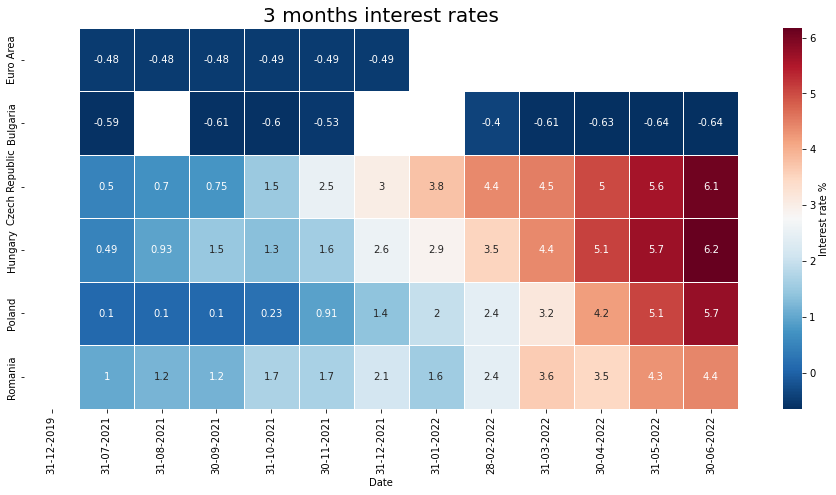

In [255]:
plt.figure(figsize = (16,7))
ax = sns.heatmap(df.T, annot=True, cmap="RdBu_r", linewidth=1, cbar_kws={'label': 'Interest rate %'})
ax.set_xticklabels(df.index.strftime('%d-%m-%Y'))
ax.invert_xaxis()
plt.title('3 months interest rates', size=20)
plt.show()

# Day-to-day money market interest rates 

In [235]:
day_to_day_int_rate = te.getEurostatData(category = 'Day-to-day money market interest rates', output_type = 'df')

In [236]:
day_to_day_int_rate

,ID,Country,Category,CategoryGroup,URL,Unit,Frequency,LatestValue,LatestValueDate,PreviousValue,PreviousValueDate,FirstValue,FirstValueDate,HighestValue,HighestValueDate,LowestValue,LowestValueDate,LastUpdate
0,7557,Euro Area,Day-to-day money market interest rates,Interest rates,/euro-area/day-to-day-money-market-interest-ra...,%,Monthly,-0.49,2021-12-31T00:00:00,-0.49,2021-11-30T00:00:00,-0.48,2021-07-31T00:00:00,-0.48,2021-07-31T00:00:00,-0.49,2021-12-31T00:00:00,2022-07-13T17:54:00
1,7558,Bulgaria,Day-to-day money market interest rates,Interest rates,/bulgaria/day-to-day-money-market-interest-rat...,%,Monthly,-0.64,2022-06-30T00:00:00,-0.64,2022-05-31T00:00:00,-0.59,2021-07-31T00:00:00,-0.40,2022-02-28T00:00:00,-0.64,2022-06-30T00:00:00,2022-07-13T17:54:00
2,7559,Czech Republic,Day-to-day money market interest rates,Interest rates,/czech-republic/day-to-day-money-market-intere...,%,Monthly,6.09,2022-06-30T00:00:00,5.61,2022-05-31T00:00:00,0.50,2021-07-31T00:00:00,6.09,2022-06-30T00:00:00,0.50,2021-07-31T00:00:00,2022-07-13T17:54:00
3,7561,Croatia,Day-to-day money market interest rates,Interest rates,/croatia/day-to-day-money-market-interest-rate...,%,Monthly,0.27,2019-12-31T00:00:00,0.27,2019-11-30T00:00:00,0.27,2019-12-31T00:00:00,0.27,2019-12-31T00:00:00,0.27,2019-12-31T00:00:00,2020-12-11T23:27:00
4,7562,Hungary,Day-to-day money market interest rates,Interest rates,/hungary/day-to-day-money-market-interest-rate...,%,Monthly,6.17,2022-06-30T00:00:00,5.69,2022-05-31T00:00:00,0.49,2021-07-31T00:00:00,6.17,2022-06-30T00:00:00,0.49,2021-07-31T00:00:00,2022-07-13T17:54:00
5,7563,Poland,Day-to-day money market interest rates,Interest rates,/poland/day-to-day-money-market-interest-rates...,%,Monthly,5.72,2022-06-30T00:00:00,5.06,2022-05-31T00:00:00,0.10,2021-07-31T00:00:00,5.72,2022-06-30T00:00:00,0.10,2021-09-30T00:00:00,2022-07-13T17:54:00
6,7564,Romania,Day-to-day money market interest rates,Interest rates,/romania/day-to-day-money-market-interest-rate...,%,Monthly,4.42,2022-06-30T00:00:00,4.30,2022-05-31T00:00:00,1.03,2021-07-31T00:00:00,4.42,2022-06-30T00:00:00,1.03,2021-07-31T00:00:00,2022-07-13T17:54:00


In [237]:
id_country = dict(zip(day_to_day_int_rate['ID'], day_to_day_int_rate['Country']))

In [250]:
df = pd.DataFrame()
df.index.name = 'Date'

for id in id_country.keys():

    interest_rate_hist = te.getHistoricalEurostat(ID=str(id), output_type = 'df')
    
    data = interest_rate_hist[['Date', 'Value']]
    data.set_index('Date', inplace=True)
    data.index = pd.to_datetime(data.index)
    
    country_data = data[['Value']].rename(columns={'Value': id_country[id]})
    df = pd.merge(df, country_data, on='Date', how='outer') 
    
df

,Euro Area,Bulgaria,Czech Republic,Croatia,Hungary,Poland,Romania
Date,,,,,,,
2021-12-31,-0.4922,NaN,3.02,NaN,2.56,1.39,2.14
2021-11-30,-0.4880,-0.53,2.51,NaN,1.57,0.91,1.67
2021-10-31,-0.4856,-0.60,1.50,NaN,1.34,0.23,1.70
2021-09-30,-0.4850,-0.61,0.75,NaN,1.47,0.10,1.16
2021-08-31,-0.4829,NaN,0.70,NaN,0.93,0.10,1.18
2021-07-31,-0.4812,-0.59,0.50,NaN,0.49,0.10,1.03
2022-06-30,NaN,-0.64,6.09,NaN,6.17,5.72,4.42
2022-05-31,NaN,-0.64,5.61,NaN,5.69,5.06,4.30
2022-04-30,NaN,-0.63,5.00,NaN,5.10,4.20,3.47


In [251]:
df.drop(columns=['Croatia'], inplace=True)
df.fillna(0)
df = df.sort_index(ascending=False)

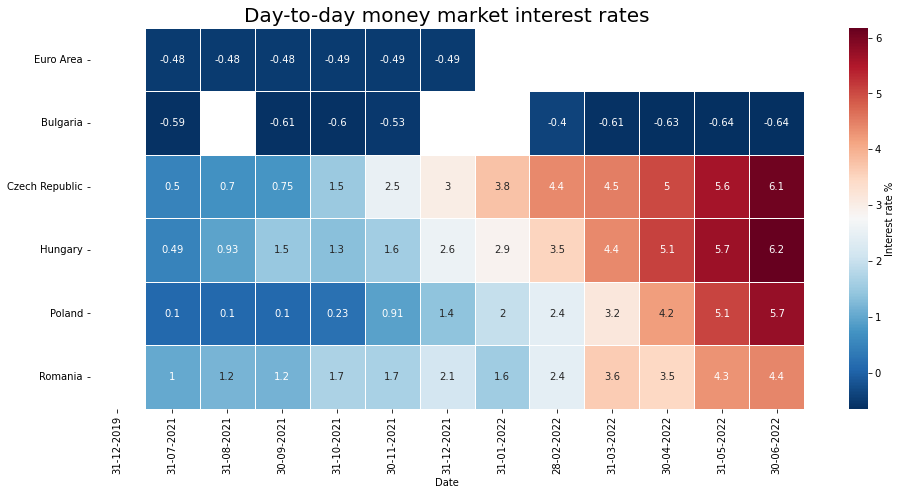

In [254]:
plt.figure(figsize = (16,7))
ax = sns.heatmap(df.T, annot=True, cmap="RdBu_r", linewidth=1, cbar_kws={'label': 'Interest rate %'})
ax.set_xticklabels(df.index.strftime('%d-%m-%Y'))
ax.invert_xaxis()
plt.title('Day-to-day money market interest rates', size=20)

plt.yticks(rotation=0) 
plt.show()